# Intrinsic Stochasticity Simulation

Intrinsic stochasticity is simulated in this notebook using an approximation based on the Gillespie's Algorithm. This algorithm computes bioquimical reactions that takes place stocastically inside a cell. In this case, it is used to simulate gene expression in cell populations. So, gene expression is represented and determined by two random variables, which define reaction type and time step for the next iteration of the algorithm. Using this algorithm is not necessary to add noise measurement due to the randomness of the algorithm. In this way, every cell show a different output a cross the whole population.

In [1]:
#libraries required
import numpy as np
import simsysbio as s2b
import matplotlib.pyplot as plt

**Defines Biological System Properties**

In [2]:
####### Determine the differential equations system
#molecular species
species = ['mRNA', 'Protein']

#reagent and product matrices
reagents = np.array([[0, 1, 1, 0],[0, 0, 0, 1]])
products = np.array([[1, 0, 1, 0],[0, 0, 1, 0]])

#kinetic parameters
parameters = ['c1', 'c2', 'c3', 'c4']

#system input. It affects first reaction
inp = 'U'
idxR = 1

#gets simbolic differential equations 
equations, variables = s2b.simbODE(species, reagents, products, parameters,
                                   inputN=inp)

#muestra las ODEs obtenidas
for s in range(0, len(species)):
    print(f'd{species[s]}/dt:', equations[s])
  
print(variables)

dmRNA/dt: U*c1 - c2*mRNA
dProtein/dt: -Protein*c4 + c3*mRNA
{'species': [mRNA, Protein], 'pars': array([c1, c2, c3, c4], dtype=object), 'nameVar': array([U, mRNA, Protein], dtype=object)}


**Creates System Input**

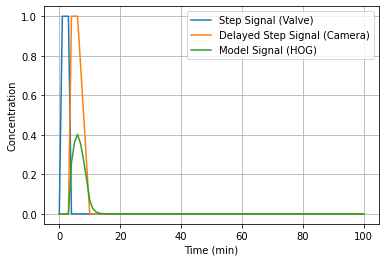

In [3]:
#computes a hog signal as system input
#duration experiment
tend = np.array([100], float)

#pulse start and end 
ton = np.array([1], float)
tdur = np.array([3], float)

#calculo de la expresion y sus respectivos perfiles
inputHOG, tog, perfiles = s2b.HOGexpr(ton, tdur, tend)

#Plotting
plt.figure()
plt.plot(tog, perfiles['t_u_Valve'], label='Step Signal (Valve)')
plt.plot(perfiles['t_u_Chamber'][0], perfiles['t_u_Chamber'][1], label='Delayed Step Signal (Camera)')
plt.plot(tog, inputHOG, label='Model Signal (HOG)')
plt.legend(loc='best')
plt.xlabel('Time (min)')
plt.ylabel('Concentration')
plt.grid()
plt.show()

**Solves System of Differential Equations**

In [4]:
#number of cells
ncells = 1000

#kinetic parameters
parsValues = [4.0, 0.010, 1.0, 0.006]

#initial concentrations
sp0 = np.zeros(len(species))

#Stores regressors
Allins = {
        "ODEs":equations,
        "inpU":inputHOG,
        "Vtime":tog,
        "species0":sp0
        }
Allins.update(variables)

Allins["idxR"] = idxR
Allins["matrizR"] = reagents
Allins["matrizP"] = products

#array to store whole population
idvExpr = np.zeros((ncells, len(tog)))

#stochastic numeric solution of the system of differential equation
for i in range(ncells):
    exprEspecies = s2b.gillAl(parsValues, Allins)
    idvExpr[i,:] = exprEspecies[-1,:]
    print("Cell:",i+1)

Cell: 1
Cell: 2
Cell: 3
Cell: 4
Cell: 5
Cell: 6
Cell: 7
Cell: 8
Cell: 9
Cell: 10
Cell: 11
Cell: 12
Cell: 13
Cell: 14
Cell: 15
Cell: 16
Cell: 17
Cell: 18
Cell: 19
Cell: 20
Cell: 21
Cell: 22
Cell: 23
Cell: 24
Cell: 25
Cell: 26
Cell: 27
Cell: 28
Cell: 29
Cell: 30
Cell: 31
Cell: 32
Cell: 33
Cell: 34
Cell: 35
Cell: 36
Cell: 37
Cell: 38
Cell: 39
Cell: 40
Cell: 41
Cell: 42
Cell: 43
Cell: 44
Cell: 45
Cell: 46
Cell: 47
Cell: 48
Cell: 49
Cell: 50
Cell: 51
Cell: 52
Cell: 53
Cell: 54
Cell: 55
Cell: 56
Cell: 57
Cell: 58
Cell: 59
Cell: 60
Cell: 61
Cell: 62
Cell: 63
Cell: 64
Cell: 65
Cell: 66
Cell: 67
Cell: 68
Cell: 69
Cell: 70
Cell: 71
Cell: 72
Cell: 73
Cell: 74
Cell: 75
Cell: 76
Cell: 77
Cell: 78
Cell: 79
Cell: 80
Cell: 81
Cell: 82
Cell: 83
Cell: 84
Cell: 85
Cell: 86
Cell: 87
Cell: 88
Cell: 89
Cell: 90
Cell: 91
Cell: 92
Cell: 93
Cell: 94
Cell: 95
Cell: 96
Cell: 97
Cell: 98
Cell: 99
Cell: 100
Cell: 101
Cell: 102
Cell: 103
Cell: 104
Cell: 105
Cell: 106
Cell: 107
Cell: 108
Cell: 109
Cell: 110
Cell: 11

Cell: 832
Cell: 833
Cell: 834
Cell: 835
Cell: 836
Cell: 837
Cell: 838
Cell: 839
Cell: 840
Cell: 841
Cell: 842
Cell: 843
Cell: 844
Cell: 845
Cell: 846
Cell: 847
Cell: 848
Cell: 849
Cell: 850
Cell: 851
Cell: 852
Cell: 853
Cell: 854
Cell: 855
Cell: 856
Cell: 857
Cell: 858
Cell: 859
Cell: 860
Cell: 861
Cell: 862
Cell: 863
Cell: 864
Cell: 865
Cell: 866
Cell: 867
Cell: 868
Cell: 869
Cell: 870
Cell: 871
Cell: 872
Cell: 873
Cell: 874
Cell: 875
Cell: 876
Cell: 877
Cell: 878
Cell: 879
Cell: 880
Cell: 881
Cell: 882
Cell: 883
Cell: 884
Cell: 885
Cell: 886
Cell: 887
Cell: 888
Cell: 889
Cell: 890
Cell: 891
Cell: 892
Cell: 893
Cell: 894
Cell: 895
Cell: 896
Cell: 897
Cell: 898
Cell: 899
Cell: 900
Cell: 901
Cell: 902
Cell: 903
Cell: 904
Cell: 905
Cell: 906
Cell: 907
Cell: 908
Cell: 909
Cell: 910
Cell: 911
Cell: 912
Cell: 913
Cell: 914
Cell: 915
Cell: 916
Cell: 917
Cell: 918
Cell: 919
Cell: 920
Cell: 921
Cell: 922
Cell: 923
Cell: 924
Cell: 925
Cell: 926
Cell: 927
Cell: 928
Cell: 929
Cell: 930
Cell: 931


**Plots Individual Output**

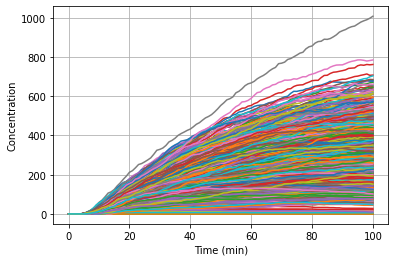

In [5]:
plt.figure()
for i in range(ncells):
    plt.plot(tog, idvExpr[i,:])
plt.xlabel('Time (min)')
plt.ylabel('Concentration')
plt.grid()
plt.show()

**Computes Population Output**

In [6]:
#takes quantiles contain betwenn 2.5 and 97.5 of the population distribution
ExprMin = np.quantile(idvExpr, 0.025, axis=0)
ExprMax = np.quantile(idvExpr, 0.975, axis=0)

#takes median of the population distribution
ExprMedn = np.median(idvExpr, axis=0)

**Plots Population Output**

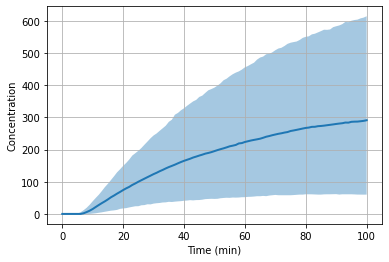

In [7]:
plt.figure()
plt.plot(tog, ExprMedn,linewidth=2)
plt.fill_between(tog, ExprMin, ExprMax, alpha = 0.4)
plt.xlabel('Time (min)')
plt.ylabel('Concentration')
plt.grid()
plt.show()